## Exploring Trends in Marine Vessel Automatic Identification System (AIS) disabling events 

### Jef Hinton 12/3/24

# Abstract

The ocean is a vital resource, supporting global food supplies and economic activity. Automatic Identification System (AIS) data is a critical tool for monitoring vessel activity, enhancing maritime safety, and preventing ship collisions. However, intentional AIS disabling creates data gaps that hinder oversight and raise concerns about potential illegal fishing activities. This study investigates whether AIS gaps are primarily employed to obscure illicit activities or to protect commercially valuable fishing locations from competitors.

Leveraging a dataset from Global Fishing Watch, this analysis examines the spatial and temporal patterns of AIS disabling events across various vessel types. The study employs geospatial techniques to identify trends in the frequency, locations, and durations of AIS gaps. By uncovering the underlying motivations behind AIS disabling, this research provides actionable insights for strengthening maritime surveillance, combating illegal fishing, and promoting sustainable marine resource management.

# Introduction

The ocean is a global resource, providing food, livelihoods, and economic opportunities for millions of people around the world. Beyond its economic significance, the ocean plays a critical role in maintaining global ecological balance, acting as a carbon sink and supporting biodiversity. However, increasing pressures such as overfishing, habitat destruction, and climate change are straining marine ecosystems.

As sea traffic continues to grow, technological tools like the Automatic Identification System (AIS) have become indispensable for  managing vessel activity, and limiting ship collisions. Despite its utility, AIS data is not without limitations. Vessels can intentionally disable their AIS systems, creating data gaps that complicate oversight. This behavior raises concerns about the motivations behind these actions. While some vessels may disable AIS to avoid detection during illegal activities, others might do so to protect sensitive or highly productive fishing locations from competitors, or they may not be disableing their system at all. Sometimes AIS gaps are caused by environmental constraints like weather, or lack of coverage. Regardless of the intent, AIS Gaps events undermine efforts to promote transparency in maritime operations and conserve marine resources.

This study explores patterns in AIS disabling events, analyzing vessel types, operational areas, and frequencies of these occurrences. By examining these dynamics, this research aims to contribute to a deeper understanding of the drivers behind AIS disabling and its implications for global marine conservation and sustainable fisheries management.


# Methods (data source and wrangling): 


Two datasets are used. The first dataset with the AIS gaps was gathered from: global fishing watch.  https://globalfishingwatch.org/data-download/datasets/public-welch-et-al-disabling-events:v20221102

The second data set is used later, from protected planet, and it's a GDB showing protected marine areas. https://www.protectedplanet.net/en/search-areas?filters%5Bis_type%5D%5B%5D=marine (Protected Planet, "Search Areas: Marine")


In [23]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


This dataset is pretty clean, but lets get you some info about it anyways. 


In [24]:
import pandas as pd


df = pd.read_csv('ais_disabling_events.csv')
df.describe()

,mmsi,vessel_length_m,vessel_tonnage_gt,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
count,5.536800e+04,55365.000000,55368.000000,55368.000000,55368.000000,5.536800e+04,55368.000000,55368.000000,5.536800e+04,55368.000000
mean,4.150034e+08,53.113900,857.755972,0.207077,10.602479,5.157071e+05,0.261127,11.273168,5.010615e+05,100.392152
std,1.206791e+08,21.321896,711.376427,31.963962,116.896361,3.480320e+05,31.946682,116.780426,3.565816e+05,371.332756
min,6.120000e+02,10.620000,12.000000,-76.095333,-179.983000,9.300000e+04,-75.934333,-179.999360,1.000000e+03,12.000000
25%,4.120563e+08,36.520000,276.000000,-19.853636,-79.861616,2.790000e+05,-19.818421,-79.581464,2.540000e+05,15.583333
50%,4.124999e+08,54.999773,736.000000,-2.366897,-16.121833,4.130000e+05,-2.364694,-14.700157,4.100000e+05,23.483333
75%,4.167720e+08,69.900000,1269.000000,26.938788,152.517194,6.610000e+05,27.216765,152.467873,6.500000e+05,67.800000
max,9.997636e+08,255.390000,9499.000000,78.214127,179.993508,2.245000e+06,80.191548,179.993225,2.262000e+06,17215.933333


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gap_id                           55368 non-null  object 
 1   mmsi                             55368 non-null  int64  
 2   vessel_class                     55368 non-null  object 
 3   flag                             54666 non-null  object 
 4   vessel_length_m                  55365 non-null  float64
 5   vessel_tonnage_gt                55368 non-null  float64
 6   gap_start_timestamp              55368 non-null  object 
 7   gap_start_lat                    55368 non-null  float64
 8   gap_start_lon                    55368 non-null  float64
 9   gap_start_distance_from_shore_m  55368 non-null  float64
 10  gap_end_timestamp                55368 non-null  object 
 11  gap_end_lat                      55368 non-null  float64
 12  gap_end_lon       

This schema is listed on the global fishing watch wesbite: https://globalfishingwatch.org/data-download/datasets/public-welch-et-al-disabling-events:v20221102

Schema

The ais_disabling_events.csv file contains the following fields:

    gap_id: Unique id of the AIS disabling event
    mmsi: Maritime Mobile Service Identity (MMSI) number of the vessel. MMSI is the unique identifier in AIS data.
    vessel_class: Geartype of the vessel. Grouped into five categories - trawlers, drifting longlines, squid jiggers, tuna purse seines, and other.
    flag: Flag state (ISO3) of the vessel.
    vessel_length_m: Vessel length (meters)
    vessel_tonnage_gt: Vessel tonnage (gross tons)
    gap_start_timestamp: Time (UTC) at the start of the AIS disabling event
    gap_start_lat: Latitude of the vessel at the start of the AIS disabling event
    gap_start_lon: Longitude of the vessel at the start of the AIS disabling event
    gap_start_distance_from_shore_m: Distance from shore (meters) of the vessel at the start of the AIS disabling event
    gap_end_timestamp: Time (UTC) at the end of the AIS disabling event
    gap_end_lat: Latitude of the vessel at the end of the AIS disabling event
    gap_end_lon: Longitude of the vessel at the end of the AIS disabling event
    gap_end_distance_from_shore_m: Distance from shore (meters) of the vessel at the end of the AIS disabling event
    gap_hours: Duration (hours) of the AIS disabling event.


(Global Fishing Watch, Public Welch et al. Disabling Events Dataset: v20221102)



Their github is here: https://github.com/GlobalFishingWatch/AIS-disabling-high-seas/tree/v1.0.0

# Results (viz and stats)



In [3]:
pip install geopy

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
from geopy.distance import geodesic

#calculate total gap hours and number of records per vessel
vessel_gap_summary = df.groupby('mmsi')['gap_hours'].sum().reset_index()
vessel_gap_summary.rename(columns={'gap_hours': 'total_gap_hours'}, inplace=True)
print(vessel_gap_summary.head())# Group by vessel class and calculate the total and average gap hours
vessel_class_summary = df.groupby('vessel_class')['gap_hours'].agg(['sum', 'mean', 'count']).reset_index()
vessel_class_summary.rename(columns={
    'sum': 'total_gap_hours',
    'mean': 'average_gap_hours',
    'count': 'number_of_gaps'
}, inplace=True)

# Sort by total gap hours to see which vessel types turn off AIS most
vessel_class_summary.sort_values('total_gap_hours', ascending=False, inplace=True)

print(vessel_class_summary)

     mmsi  total_gap_hours
0     612        31.016667
1     732        21.883333
2     857        17.683333
3   92455        24.383333
4  201851      3556.766667
         vessel_class  total_gap_hours  average_gap_hours  number_of_gaps
0  drifting_longlines     2.201604e+06         118.105483           18641
4   tuna_purse_seines     1.241893e+06         144.071098            8620
2        squid_jigger     9.952089e+05          62.119028           16021
3            trawlers     6.195127e+05          78.290499            7913
1               other     5.002938e+05         119.888286            4173


This shows some info on total gap hours and number of gaps per vessel_class it looks like our dataset has alot of gaps for squid_jiggers and drifting_longlines

In [5]:
# Identify unique vessels with at least one gap per class
vessels_with_gaps = df.groupby('vessel_class')['mmsi'].nunique().reset_index()
vessels_with_gaps.rename(columns={'mmsi': 'vessels_with_gaps'}, inplace=True)

# Count the total number of unique vessels per class
total_vessels = df.groupby('vessel_class')['mmsi'].nunique().reset_index()
total_vessels.rename(columns={'mmsi': 'unique_vessels'}, inplace=True)

# Merge the two datasets
vessel_class_summary = vessels_with_gaps.merge(total_vessels, on='vessel_class')

# Calculate the percentage of vessels with gaps
vessel_class_summary['percent_with_gaps'] = (
    vessel_class_summary['vessels_with_gaps'] / vessel_class_summary['unique_vessels'] * 100
)

# Display the corrected summary
print(vessel_class_summary)


         vessel_class  vessels_with_gaps  unique_vessels  percent_with_gaps
0  drifting_longlines               2191            2191              100.0
1               other                945             945              100.0
2        squid_jigger                806             806              100.0
3            trawlers                917             917              100.0
4   tuna_purse_seines                419             419              100.0


Every vessel in this dataset has a gap. So that's interesting, more research about unintentional gaps would let us speculate why that may be the case. Either way, let's move into a heat map to see the locations where the gaps are lat/long wise. 

In [27]:
import numpy as np

#create bins 10 degree in both direction
lat_bins = np.arange(-90, 91, 10) 
lon_bins = np.arange(-180, 181, 10) 

# Bin latitude and longitude into regions
df['lat_bin'] = pd.cut(df['gap_start_lat'], bins=lat_bins, labels=lat_bins[:-1])
df['lon_bin'] = pd.cut(df['gap_start_lon'], bins=lon_bins, labels=lon_bins[:-1])

# group by regions
regional_gaps = df.groupby(['lat_bin', 'lon_bin']).agg(
    total_gap_hours=('gap_hours', 'sum'),
    average_gap_hours=('gap_hours', 'mean'),
    total_distance_from_shore_m=('gap_start_distance_from_shore_m',sum) 
).reset_index()


# Sort regions by total gap hours
regional_gaps = regional_gaps.sort_values(by='total_gap_hours', ascending=False)

# Display the top regions
print(regional_gaps.head(10))

    lat_bin lon_bin  total_gap_hours  average_gap_hours  \
155     -50     -70    544003.216667          82.349866   
501      40     150    226553.583333          53.019795   
502      40     160    166257.783333          55.697750   
311     -10      50    138900.333333         228.079365   
156     -50     -60    136870.133333          78.300992   
323     -10     170    120306.633333         116.126094   
341       0     -10    111028.166667         172.136693   
289     -10    -170    104020.816667         189.128758   
322     -10     160    102178.083333         115.065409   
340       0     -20    100434.683333         141.457300   

     total_distance_from_shore_m  
155                 2.512077e+09  
501                 2.328716e+09  
502                 2.417102e+09  
311                 1.509340e+08  
156                 6.841650e+08  
323                 2.513240e+08  
341                 2.015690e+08  
289                 2.470570e+08  
322                 2.492310e+08  


/tmp/ipykernel_216/4197432571.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_gaps = df.groupby(['lat_bin', 'lon_bin']).agg(
/tmp/ipykernel_216/4197432571.py:12: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  regional_gaps = df.groupby(['lat_bin', 'lon_bin']).agg(


First thing's first, lets build some context. So since AIS is supposed to prevent maritime collisions, I'd like to know how big these boats are, lets plot their length and weight to see are these boats evenly distributed, is one class generally bigger than the other, and just generally get the lay of the land. 

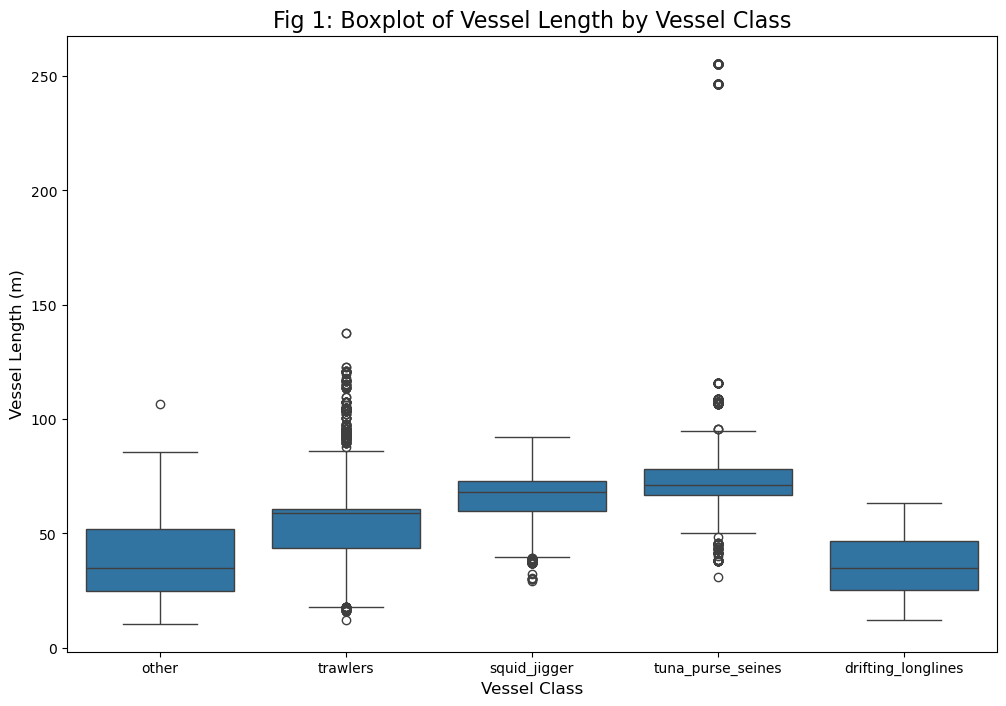

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already loaded in `df`
plt.figure(figsize=(12, 8))
sns.boxplot(x='vessel_class', y='vessel_length_m', data=df)

# Add title and labels
plt.title('Fig 1: Boxplot of Vessel Length by Vessel Class', fontsize=16)
plt.xlabel('Vessel Class', fontsize=12)
plt.ylabel('Vessel Length (m)', fontsize=12)

# Show the plot
plt.show()

#### Figure 1: Vessel Length by Vessel Class

 I don't know much about fishing vessels, I wonder if the size of the boat matters on the frequency of AIS gaps. I would think a bigger boat might be more difficult to drive, so I'd be more likely to leave the AIS system engaged to reduce collisions. It looks like most vessels are less than 100m long, and generally larger than 20m long. 

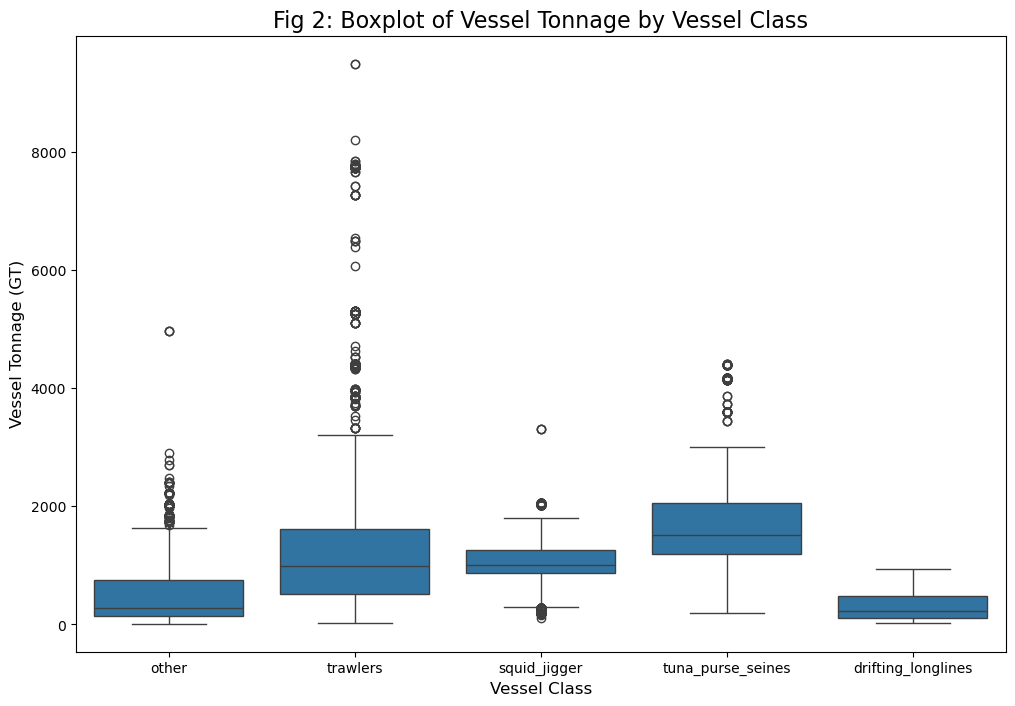

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='vessel_class', y='vessel_tonnage_gt', data=df)

# Add title and labels
plt.title('Fig 2: Boxplot of Vessel Tonnage by Vessel Class', fontsize=16)
plt.xlabel('Vessel Class', fontsize=12)
plt.ylabel('Vessel Tonnage (GT)', fontsize=12)

# Show the plot
plt.show()

#### Figure 2:

Tonnage seems to vary between classes, with most being below 2000 GT. Trawlers have alot of outliers on the right side of their distribution. 

In [37]:
# correlation between vessel tonnage and gap hours
correlation_tonnage = df[['vessel_tonnage_gt', 'gap_hours']].corr().iloc[0, 1]

# Print the correlation result
print(f"Correlation between vessel tonnage and gap hours: {correlation_tonnage}")

Correlation between vessel tonnage and gap hours: 0.017409781889485162


This is pretty close to zero, so that would suggest there's not a strong corellation between tonnage and gap hours. I was personally hoping to see a negative corellation, to say that heavier boats have fewer gap hours, but sadly this dataset doesn't support that claim. 

Now that we know how big the boats are lets see where these AIS gaps are happening. Next up there's a couple of heat maps. 

/tmp/ipykernel_216/1584710285.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


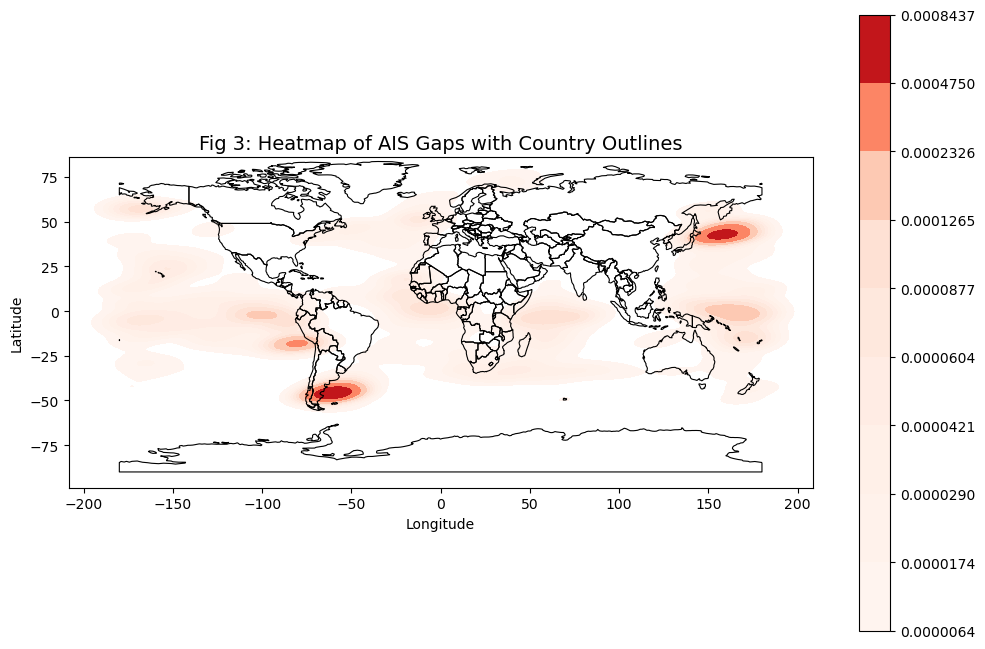

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#load shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare data
gap_locations = df[['gap_start_lat', 'gap_start_lon']].dropna()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(
    x=gap_locations['gap_start_lon'],
    y=gap_locations['gap_start_lat'],
    cmap="Reds",
    fill=True,
    cbar=True,
    bw_adjust=0.5,
    ax=ax
)

# Plot country borders
world.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Add labels
plt.title('Fig 3: Heatmap of AIS Gaps with Country Outlines', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Figure 3: Heatmap of AIS gaps with Country Outlines

An interesting piece of future data would be to add additional  markings for protected areas where fishing is limited or prohibited. If there was a high corellation of AIS gaps near protected areas that may be something to consider. this heat map looks like it has two major hotspots. One is north east of Japan (45, 150) and the other is between Argentina and the falkland islands. (-50, -60) 

Now that we have two hot spots I'm interested to see if AIS events are near protected areas. 

I imported a dataset from Protected Planet with shapes of protected fishiung areas. to combine with the previous heatmap. 

https://www.protectedplanet.net/en/search-areas?filters%5Bis_type%5D%5B%5D=marine (Protected Planet, "Search Areas: Marine")

/tmp/ipykernel_216/2313834991.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


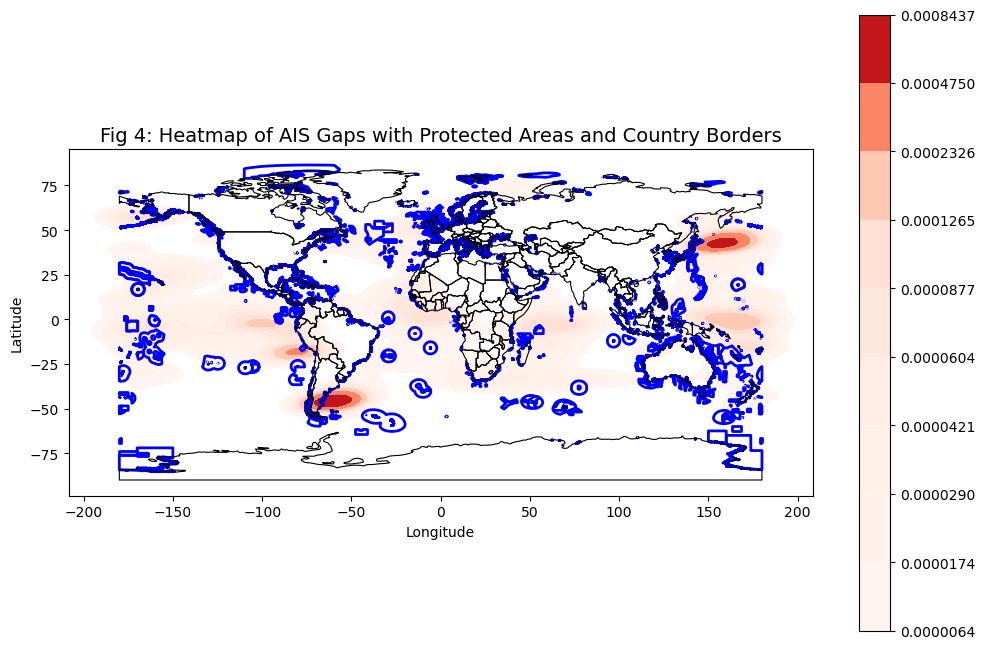

In [46]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point

# load shapefile of world 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load the protected areas
protected_loc_df = gpd.read_file('WDPAgeodb.gdb', layer='WDPA_WDOECM_poly_Dec2024_1b091e2b51c258eb3b24328044a4a3d6979e00fa2029d7538aef2befd46da362')

# Load AIS gap locations (assuming 'gap_start_lat' and 'gap_start_lon' columns are in your DataFrame)
gap_locations = df[['gap_start_lat', 'gap_start_lon']].dropna()
geometry = [Point(lon, lat) for lon, lat in zip(gap_locations['gap_start_lon'], gap_locations['gap_start_lat'])]

# Create a GeoDataFrame for AIS gap locations
gdf_gaps = gpd.GeoDataFrame(gap_locations, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf_gaps.crs = 'EPSG:4326'

# Plot the combined map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the heatmap of AIS gaps
sns.kdeplot(
    x=gdf_gaps.geometry.x, 
    y=gdf_gaps.geometry.y,
    cmap="Reds", 
    fill=True, 
    cbar=True,
    bw_adjust=0.5,
    ax=ax
)

# Plot country borders
world.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot the boundaries of protected areas
protected_loc_df.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2)

# Title and labels
plt.title('Fig 4: Heatmap of AIS Gaps with Protected Areas and Country Borders', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

#### Figure 4: Heatmap of AIS Gaps with Protected Areas and Country Borders

I'd like to see if there's a corellation between the type of fishing vessel and the heat map, or if certain vessels are more likely to have AIS gaps near protected areas. Either way, based on this heat map, I would need more data to support the claim that all AIS gaps are so that illegal fishing can take place in protected areas. Based on this map don't think that the hot spots are particularly close to specific protected areas, however some of these gaps last many hours, and could enable a ship to move to the protected area, and then back out within that window. Future research could include breaking down this heat map by vessel type. 


In [5]:
print(df['vessel_class'].unique())

['other' 'trawlers' 'squid_jigger' 'tuna_purse_seines'
 'drifting_longlines']


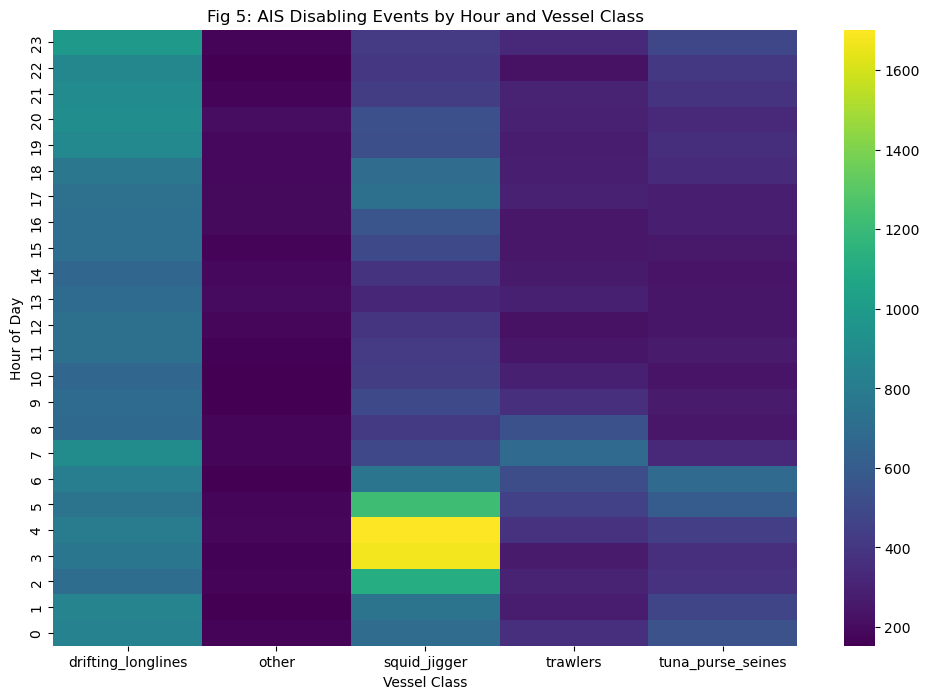

                              vessel_class  gap_start_hour  count
vessel_class                                                     
drifting_longlines 23   drifting_longlines              23    994
other              44                other              20    206
squid_jigger       52         squid_jigger               4   1702
trawlers           79             trawlers               7    681
tuna_purse_seines  102   tuna_purse_seines               6    682


/tmp/ipykernel_216/1100809354.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_hours = hourly_pattern.groupby('vessel_class').apply(


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ais_disabling_events.csv')
df.describe()

# Convert 'gap_start_timestamp' to datetime
df['gap_start_timestamp'] = pd.to_datetime(df['gap_start_timestamp'])

# Extract the hour from 'gap_start_timestamp'
df['gap_start_hour'] = df['gap_start_timestamp'].dt.hour

# Group by 'vessel_class' and 'gap_start_hour
hourly_pattern = df.groupby(['vessel_class', 'gap_start_hour']).size().reset_index(name='count')

# Pivot the data for easier visualization
hourly_pivot = hourly_pattern.pivot(index='gap_start_hour', columns='vessel_class', values='count').fillna(0)

# Plos
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, cmap='viridis', annot=False, fmt="g")
plt.title('Fig 5: AIS Disabling Events by Hour and Vessel Class')
plt.xlabel('Vessel Class')
plt.ylabel('Hour of Day')

# Adjust the y-axis to place hour 0 at the bottom
plt.gca().invert_yaxis()

plt.show()

# Optional: Analyze top patterns
top_hours = hourly_pattern.groupby('vessel_class').apply(
    lambda x: x.loc[x['count'] == x['count'].max()]
)
print(top_hours)

#### Figure 5 AIS Disabling Events by Hour and Vessel Class

Based on the plot above, it looks like each category of vessel has a different profile for their AIS disabling events. The majority of AIS disabiling events in our dataset look pretty well spread out for vessel classes drifting_longlines and other. The frequency is relatively consistent and similar throughout the day. The Squid jiggers vessel class heatmap looks a bit different than the others. The plot shows a large number of gaps from 2 to 6 AM. Trawlers see more gaps from 6-8 am and tuna purse seines see more gaps from midnight to 7 am then they do in the rest of the day. Included below is a photo of a Squid Jigger. 

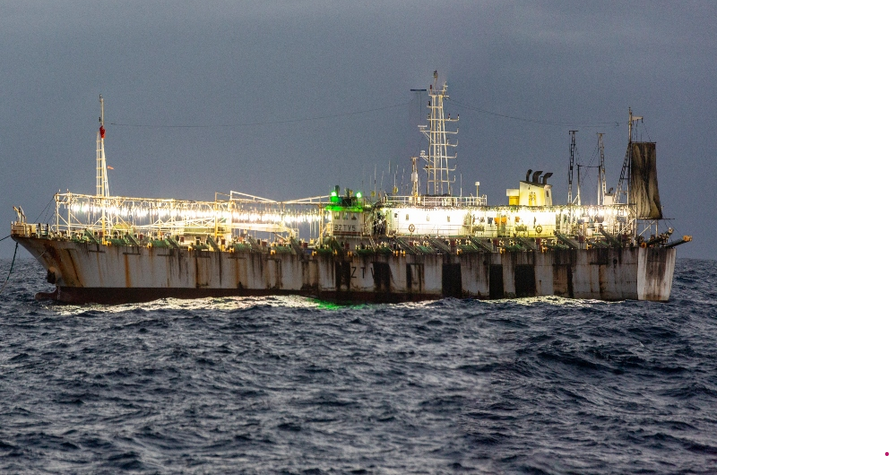

#### Figure 6 Image of Squid Jigger for context. 

This image, and more info on squid fishing available from: https://globalfishingwatch.org/article/squid-fishing-southeast-pacific/

Squid is caught by squid jiggers primarily from dusk until dawn, the boats have lights that attract the squid to the surface 

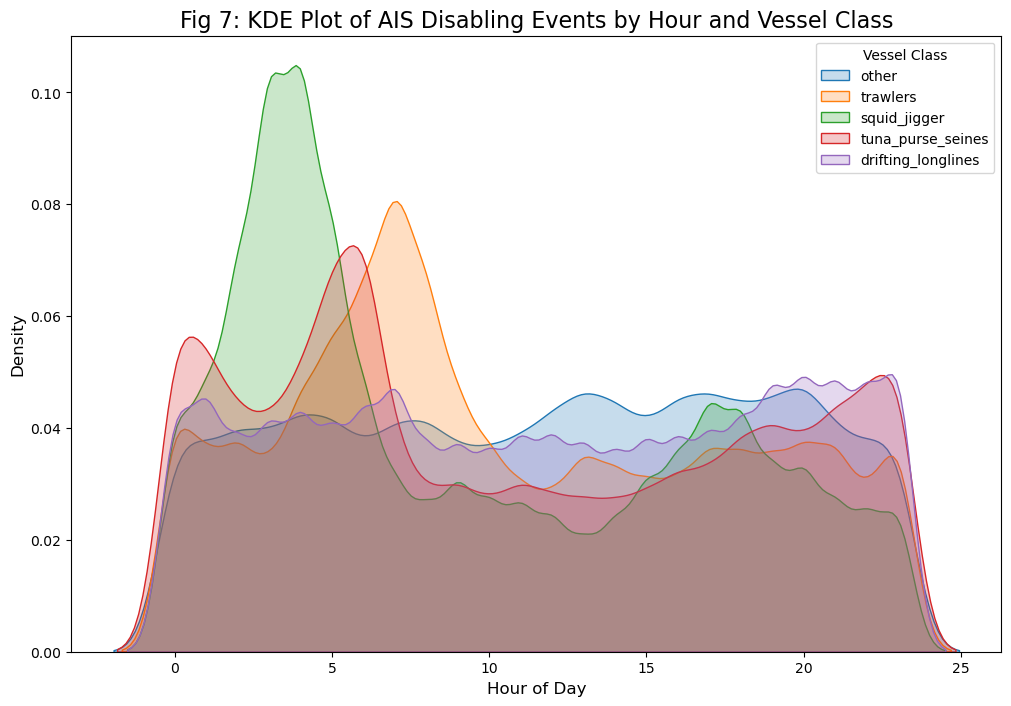

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ais_disabling_events.csv')

# Convert 'gap_start_timestamp' to datetime
df['gap_start_timestamp'] = pd.to_datetime(df['gap_start_timestamp'])

# Extract the hour from 'gap_start_timestamp'
df['gap_start_hour'] = df['gap_start_timestamp'].dt.hour

# Set up the plot
plt.figure(figsize=(12, 8))

# Iterate over each vessel class and plot its KDE
for vessel in df['vessel_class'].unique():
    # Filter the data for the specific vessel class
    subset = df[df['vessel_class'] == vessel]
    
    # Plot the KDE for that vessel class based on the hour
    sns.kdeplot(subset['gap_start_hour'], label=vessel, fill=True, bw_adjust=0.5)

# Title and labels
plt.title('Fig 7: KDE Plot of AIS Disabling Events by Hour and Vessel Class', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend
plt.legend(title='Vessel Class')

# Show the plot
plt.show()


#### Figure 7 KDE plot of AIS disabling events.   

So the heatmap is biased because most of the AIS gaps above were from squid jiggers, so the KDE helps balance the data out to chart density based on that vessel's hours only. So here we see that same peak for squid jiggers, but there are also other peaks for tuna purse seines and trawlers early in the day, then there's a dip during midday in AIS gaps and then a slight trend upward toward the end of the day. 

# Discussion (who cares?)

This analysis of AIS disabling events among maritime vessels reveals patterns in the usage of AIS gaps. Certain vessel types may be more prone to AIS disabling and different geographic locations have higher occurrences of AIS gaps. While the motivations for these gaps remain speculative, several hypotheses emerge:

    Strategic Concealment:
        Patterns of AIS disabling may align with economically productive fishing areas, supporting the hypothesis that vessels disable AIS to protect fishing locations from competitors.

    Illegal Activities:
        Conversely, the occurrence of disabling events in regions associated with illegal fishing activities cannot be discounted. Spatial correlations with known illegal fishing hotspots would strengthen this hypothesis. Or a dataset with the ability to check if a vessel has the correct documentation or licensing to fish in that region could also help. 

    Operational Challenges:
        Non-malicious explanations, such as equipment failure due to an overcrowded area or weather can also account for some AIS gaps.

Implications for Conservation Policy: Understanding the motivations behind AIS disabling is vital for informed fisheries management and maritime policy. Enhanced monitoring, combined with targeted enforcement in high-risk areas, could deter illegal activities while respecting legitimate vessels rite to the seas. Further research into spatial-temporal patterns and collaboration with maritime stakeholders can refine these insights.


# Conclusion 


# Citations

Global Fishing Watch. "Public Welch et al. Disabling Events Dataset: v20221102." Global Fishing Watch, Global Fishing Watch, 2 Nov. 2022, https://globalfishingwatch.org/data-download/datasets/public-welch-et-al-disabling-events:v20221102. Accessed 3 Dec. 2024.

Global Fishing Watch. AIS Disabling on the High Seas, Version 1.0.0. GitHub, Global Fishing Watch, https://github.com/GlobalFishingWatch/AIS-disabling-high-seas/tree/v1.0.0. Accessed 3 Dec. 2024.

Protected Planet. "Search Areas: Marine." Protected Planet, UN Environment Programme, https://www.protectedplanet.net/en/search-areas?filters%5Bis_type%5D%5B%5D=marine. Accessed 3 Dec. 2024.

Windward. "Mind the AIS Gap." Windward, Windward, 26 Apr. 2023, https://windward.ai/blog/mind-the-ais-gap/.
